In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from gendis.genetic import GeneticExtractor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tools.data_extraction import DataExtractor
from tools.trajectory_generator import TrajectoryGenerator
from tools.utils import standardize_data, print_genetic_param, print_settings, set_movements, angle_diff
from tools.experiments import Experiments

np.random.seed(1337)  # Random seed for reproducibility

tr_gen_options = {"samples": 25,
                  "freq": 3,
                  "reset_data": True}
dt_gen_options = {"n_test": 150}

train_test_options = {"split": 25}

df_csv_options = {"ts_class": "Bearing"}

gen_options = {"population_size": 20,
               "iterations": 20,
               "verbose": True,
               "normed": True,
               "add_noise_prob": 0.0,
               "add_shapelet_prob": 0.3,
               "wait": 10,
               "plot": True,
               "remove_shapelet_prob": 0.3,
               "crossover_prob": 0.66,
               "n_jobs": 4}

settings = {"trajectory_generator_options": tr_gen_options,
            "data_generation_options": dt_gen_options,
            "train_test_options":train_test_options,
            "define_csvs_option": df_csv_options,
            "genetic_options": gen_options}

tr_gen_options = settings["trajectory_generator_options"]
dt_gen_options = settings["data_generation_options"]
df_csvs_options = settings["define_csvs_option"]
train_test_options = settings["train_test_options"]
genetic_options = settings["genetic_options"]

first_movement = ['creeping_line_left']
second_movement = ['random']
movements = {'first_movement': first_movement,'second_movement': second_movement}
set_movements(movements)


In [2]:
# Create files if not created
tr_gen = TrajectoryGenerator(**tr_gen_options)
tr_gen.data_generation(**dt_gen_options)
# Read in the datafiles
dex = DataExtractor()
train_df, test_df = dex.train_test_dataframes(**train_test_options)
print("The train samples length is:{0}".format(len(train_df[0] * train_test_options["split"]*2)))
print("The test samples length is:{0}\n".format(len(test_df[0] * train_test_options["split"]*2)))
dex.define_csv(**df_csvs_options)

x_train, y_train, x_test, y_test = dex.load_datasets()


Create directory 'data' 
now creating data for movement: creeping_line_left
now creating data for movement: random
Done with generator

Reading the data files....Done reading files
The train samples length is:160
The test samples length is:40

Creating x_train.csv--y_train.csv and x_test.csv--y_test.csv ...Done with train.csv ...Done with test.csv
Loading the csv files to the appropriate train and test arrays(nparrays)...Done


In [3]:
#x_train=angle_diff(x_train)
#x_test=angle_diff(x_test)


In [4]:
# real_data =  pd.read_csv("/home/kapadais/Desktop/HUA Thesis/ptixiaki hua/data/route.csv")
# real_data = real_data [["TIMESTAMP","LAT","LON","HEADING"]][:550]
# #real_data = real_data [["TIMESTAMP","LAT","LON"]][:750]
# real_data.sort_values('TIMESTAMP',inplace=True)
# n_split = len(real_data)/train_test_options["split"]
# real_data = np.split(real_data, n_split)


In [5]:
# i = 0
# k = 0
# x_test = x_test[:42]
# while i < len(x_test):
    
#     if not i % 2 :
#         x_ds = np.array(real_data[k]["HEADING"])
#         x_test[i] = x_ds
#         k = k + 1
#     i = i + 1


In [6]:
# x_test

In [7]:
# # Visualize the timeseries in the train and test set
# colors = ['r', 'b', 'g', 'y', 'c']
# plt.figure(figsize=(20, 10))
# for ts, label in zip(x_train, y_train):
#     plt.plot(range(len(ts)), ts, c=colors[int(label%len(colors))])
# plt.title('The timeseries in the train set')
# plt.show()

# plt.figure(figsize=(20, 10))
# for ts, label in zip(x_test, y_test):
#     plt.plot(range(len(ts)), ts, c=colors[int(label%len(colors))])
# plt.title('The timeseries in the test set')
# plt.show()

standardized train and test data

Starting fit in genetic extractor with:
population size:20
iterations: 20
normed: True
noise_prob: 0.0
add_shapelet_prob: 0.3
remove_shapelet_prob: 0.3
crossover_prob: 0.66



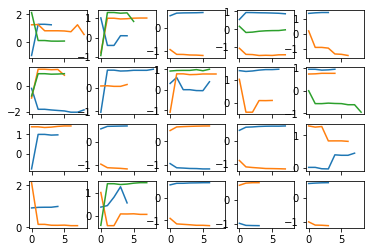

it		avg		std		max		time
1		-0.5505		0.071		-0.42259	4.0742
2		-0.5324		0.063		-0.42259	1.8019
3		-0.4824		0.092		-0.356472	1.9808
4		-0.4884		0.059		-0.356472	1.7609
5		-0.4627		0.058		-0.356472	2.4682
6		-0.4075		0.047		-0.347946	2.1675
7		-0.3847		0.03		-0.347946	1.8258
8		-0.3633		0.015		-0.335324	2.2515
9		-0.3347		0.031		-0.289507	2.1527
10		-0.3172		0.032		-0.289507	1.9588
11		-0.3104		0.031		-0.277866	2.8296
12		-0.3306		0.04		-0.277082	2.3902
13		-0.3007		0.032		-0.268094	2.4825
14		-0.3125		0.05		-0.261666	2.3819
15		-0.2786		0.02		-0.261666	2.3574
16		-0.2669		0.016		-0.24741	2.5552
17		-0.2722		0.017		-0.24741	3.2947
18		-0.2656		0.014		-0.24741	2.7997
19		-0.2549		0.007		-0.241851	2.7347
20		-0.2495		0.012		-0.232406	2.826


In [8]:
print("standardized train and test data\n")
x_train, x_test = standardize_data(x_train, x_test)
genetic_extractor = GeneticExtractor(**genetic_options)
print_genetic_param(genetic_extractor)
genetic_extractor.fit(x_train, y_train)

In [9]:
distances_train = genetic_extractor.transform(x_train)
distances_test = genetic_extractor.transform(x_test)
lr = LogisticRegression()
lr.fit(distances_train, y_train)

# Print the accuracy score on the test set
accuracy_result = accuracy_score(y_test, lr.predict(distances_test))
print('Accuracy = {}'.format(accuracy_result))

Accuracy = 0.5


In [40]:
a=lr.predict(distances_test)
for idx, x in enumerate(y_test):
    if x != a[idx]:
        print(test_df[0][int(idx/2)]["Bearing"])

0    101
1      6
2      6
3      6
4      6
5      6
6      6
7      6
8      6
9      6
Name: Bearing, dtype: object
10    148
11     59
12     59
13     59
14     59
15     59
16     59
17     59
18     59
19     59
Name: Bearing, dtype: object


In [34]:
test_df[0]

[             Timestamp        Lat        Lon Bearing Speed  Distance
 0  2015-02-01 12:00:00  37.295493  23.824322     101    10       0.0
 1  2015-02-01 12:03:00  37.299960  23.824912       6    10       0.5
 2  2015-02-01 12:06:00  37.304427  23.825502       6    10       0.5
 3  2015-02-01 12:09:00  37.308894  23.826093       6    10       0.5
 4  2015-02-01 12:12:00  37.313361  23.826683       6    10       0.5
 5  2015-02-01 12:15:00  37.317828  23.827273       6    10       0.5
 6  2015-02-01 12:18:00  37.322295  23.827864       6    10       0.5
 7  2015-02-01 12:21:00  37.326762  23.828454       6    10       0.5
 8  2015-02-01 12:24:00  37.331229  23.829045       6    10       0.5
 9  2015-02-01 12:27:00  37.335696  23.829635       6    10       0.5,
               Timestamp        Lat        Lon Bearing Speed  Distance
 10  2015-02-01 12:00:00  37.295493  23.824322     148    10       0.0
 11  2015-02-01 12:03:00  37.297806  23.829162      59    10       0.5
 12  2015-02-01 